In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ot
from tqdm import tqdm

In [2]:
data_folder= os.path.join('..', 'data')
raw_angles = os.path.join(data_folder, 'A_2D_1ps.dat')
shifted_angles = os.path.join(data_folder, 'ADP_2D.txt')
shifted_df = pd.read_csv(shifted_angles, sep=' ', names=['phi', 'psi'])
df = pd.read_csv(raw_angles, sep=' ', names=['phi', 'psi'])
df['rescaled_phi'] = (180 + df['phi']) / 360
df['rescaled_psi'] = (180 + df['psi']) / 360


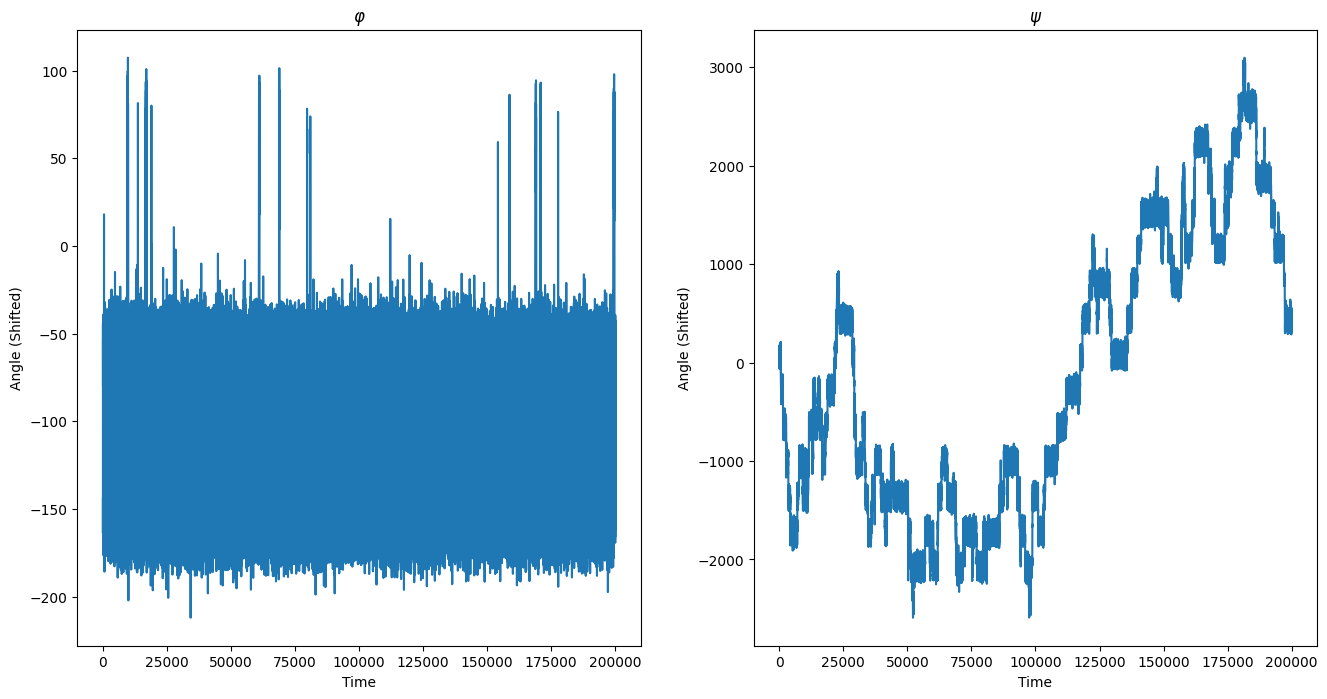

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 8)
sns.lineplot(shifted_df['phi'], ax=ax1)
sns.lineplot(shifted_df['psi'], ax=ax)
ax1.set_title(r"$\varphi$")
ax2.set_title(r"$\psi$")
ax1.set_ylabel("Angle (Shifted)")
ax2.set_ylabel("Angle (Shifted)")
ax1.set_xlabel("Time")
ax2.set_xlabel("Time")
plt.savefig("nonperiodic-angle-series.pdf", bbox_inches="tight")

In [37]:
def changes(data, windowsize, p):
    sample_count = data.shape[0]
    arr = data.to_numpy()
    differences = np.zeros(sample_count)
    for t in tqdm(range(windowsize, sample_count - windowsize)):
        sample_a = arr[t - windowsize:t]
        sample_b = arr[t: t + windowsize]
        differences[t] = ot.wasserstein_circle(sample_a, sample_b, p=p)
    result = pd.Series(differences)
    return differences

In [ ]:
w = 300
df[f'dw_phi_{w}'] = changes(df['rescaled_phi'], w)
df[f'dw_psi_{w}'] = changes(df['rescaled_psi'], w)


In [ ]:
df[f'dw1_phi_{w}'] = changes(df['rescaled_phi'], w, p=1)
df[f'dw1_psi_{w}'] = changes(df['rescaled_psi'], w, p=1)

In [54]:
def euc_changes(data, windowsize):
    sample_count = data.shape[0]
    arr = data.to_numpy()
    differences = np.zeros(sample_count)
    for t in tqdm(range(windowsize, sample_count - windowsize)):
        sample_a = arr[t - windowsize:t]
        sample_b = arr[t: t + windowsize]
        differences[t] = ot.emd2_1d(sample_a, sample_b)
    result = pd.Series(differences)
    return differences

In [55]:
df['shifted_phi'] = shifted_df['phi']
df['shifted_psi'] = shifted_df['psi']

In [56]:
df[f'dw_shifted_phi_{w}'] = euc_changes(df['shifted_phi'], w)
df[f'dw_shifted_psi_{w}'] = euc_changes(df['shifted_psi'], w)

  0% 0/199400 [00:00<?, ?it/s]

  0% 409/199400 [00:00<00:48, 4087.38it/s]

  0% 843/199400 [00:00<00:46, 4233.13it/s]

  1% 1291/199400 [00:00<00:45, 4345.22it/s]

  1% 1747/199400 [00:00<00:44, 4426.89it/s]

  1% 2209/199400 [00:00<00:43, 4496.20it/s]

  1% 2661/199400 [00:00<00:43, 4502.84it/s]

  2% 3143/199400 [00:00<00:42, 4603.58it/s]

  2% 3604/199400 [00:00<00:42, 4587.15it/s]

  2% 4063/199400 [00:00<00:43, 4528.40it/s]

  2% 4516/199400 [00:01<00:43, 4512.40it/s]

  2% 4977/199400 [00:01<00:42, 4540.13it/s]

  3% 5432/199400 [00:01<00:42, 4538.79it/s]

  3% 5886/199400 [00:01<00:42, 4527.26it/s]

  3% 6339/199400 [00:01<00:44, 4381.38it/s]

  3% 6779/199400 [00:01<00:44, 4338.85it/s]

  4% 7214/199400 [00:01<00:44, 4313.85it/s]

  4% 7668/199400 [00:01<00:43, 4378.86it/s]

  4% 8114/199400 [00:01<00:43, 4400.95it/s]

  4% 8560/199400 [00:01<00:43, 4417.54it/s]

  5% 9003/199400 [00:02<00:43, 4359.78it/s]

  5% 9455/199400 [00:02<00:43, 4404.28it/s]

  5% 9896/199400 [00:02<00:43, 4364.10it/s]

  5% 10360/199400 [00:02<00:42, 4441.46it/s]

  5% 10805/199400 [00:02<00:43, 4378.11it/s]

  6% 11244/199400 [00:02<00:44, 4238.13it/s]

  6% 11669/199400 [00:02<00:47, 3948.94it/s]

  6% 12129/199400 [00:02<00:45, 4128.90it/s]

  6% 12582/199400 [00:02<00:44, 4240.87it/s]

  7% 13027/199400 [00:02<00:43, 4300.18it/s]

  7% 13481/199400 [00:03<00:42, 4369.74it/s]

  7% 13940/199400 [00:03<00:41, 4434.47it/s]

  7% 14386/199400 [00:03<00:42, 4384.38it/s]

  7% 14856/199400 [00:03<00:41, 4476.60it/s]

  8% 15305/199400 [00:03<00:41, 4384.29it/s]

  8% 15745/199400 [00:03<00:42, 4323.77it/s]

  8% 16187/199400 [00:03<00:42, 4349.91it/s]

  8% 16646/199400 [00:03<00:41, 4419.16it/s]

  9% 17119/199400 [00:03<00:40, 4509.20it/s]

  9% 17580/199400 [00:03<00:40, 4537.80it/s]

  9% 18035/199400 [00:04<00:40, 4516.10it/s]

  9% 18487/199400 [00:04<00:40, 4457.04it/s]

  9% 18934/199400 [00:04<00:40, 4430.34it/s]

 10% 19391/199400 [00:04<00:40, 4470.13it/s]

 10% 19855/199400 [00:04<00:39, 4518.96it/s]

 10% 20315/199400 [00:04<00:39, 4542.99it/s]

 10% 20788/199400 [00:04<00:38, 4597.23it/s]

 11% 21257/199400 [00:04<00:38, 4624.78it/s]

 11% 21735/199400 [00:04<00:38, 4669.30it/s]

 11% 22203/199400 [00:05<00:38, 4633.15it/s]

 11% 22667/199400 [00:05<00:38, 4561.41it/s]

 12% 23124/199400 [00:05<00:39, 4483.73it/s]

 12% 23573/199400 [00:05<00:39, 4476.58it/s]

 12% 24021/199400 [00:05<00:39, 4444.68it/s]

 12% 24466/199400 [00:05<00:39, 4436.49it/s]

 12% 24912/199400 [00:05<00:39, 4440.17it/s]

 13% 25357/199400 [00:05<00:41, 4199.49it/s]

 13% 25780/199400 [00:05<00:42, 4127.27it/s]

 13% 26245/199400 [00:05<00:40, 4276.73it/s]

 13% 26698/199400 [00:06<00:39, 4349.78it/s]

 14% 27150/199400 [00:06<00:39, 4399.57it/s]

 14% 27592/199400 [00:06<00:39, 4354.34it/s]

 14% 28058/199400 [00:06<00:38, 4442.79it/s]

 14% 28516/199400 [00:06<00:38, 4483.31it/s]

 15% 28965/199400 [00:06<00:38, 4463.90it/s]

 15% 29412/199400 [00:06<00:38, 4434.41it/s]

 15% 29856/199400 [00:06<00:38, 4428.65it/s]

 15% 30300/199400 [00:06<00:38, 4418.92it/s]

 15% 30751/199400 [00:06<00:37, 4445.05it/s]

 16% 31214/199400 [00:07<00:37, 4497.89it/s]

 16% 31682/199400 [00:07<00:36, 4551.79it/s]

 16% 32138/199400 [00:07<00:38, 4320.50it/s]

 16% 32602/199400 [00:07<00:37, 4412.42it/s]

 17% 33046/199400 [00:07<00:38, 4332.01it/s]

 17% 33481/199400 [00:07<00:39, 4244.76it/s]

 17% 33917/199400 [00:07<00:38, 4277.01it/s]

 17% 34346/199400 [00:07<00:39, 4213.60it/s]

 17% 34791/199400 [00:07<00:38, 4281.63it/s]

 18% 35253/199400 [00:07<00:37, 4380.90it/s]

 18% 35714/199400 [00:08<00:36, 4446.38it/s]

 18% 36160/199400 [00:08<00:36, 4428.40it/s]

 18% 36604/199400 [00:08<00:37, 4399.75it/s]

 19% 37060/199400 [00:08<00:36, 4445.07it/s]

 19% 37513/199400 [00:08<00:36, 4467.18it/s]

 19% 37982/199400 [00:08<00:35, 4530.65it/s]

 19% 38436/199400 [00:08<00:35, 4485.76it/s]

 20% 38885/199400 [00:08<00:35, 4467.26it/s]

 20% 39332/199400 [00:08<00:36, 4398.87it/s]

 20% 39773/199400 [00:09<00:36, 4371.64it/s]

 20% 40237/199400 [00:09<00:35, 4450.62it/s]

 20% 40683/199400 [00:09<00:36, 4408.80it/s]

 21% 41125/199400 [00:09<00:36, 4396.39it/s]

 21% 41571/199400 [00:09<00:35, 4414.81it/s]

 21% 42013/199400 [00:09<00:35, 4382.74it/s]

 21% 42474/199400 [00:09<00:35, 4449.67it/s]

 22% 42920/199400 [00:09<00:35, 4425.72it/s]

 22% 43363/199400 [00:09<00:35, 4410.15it/s]

 22% 43805/199400 [00:09<00:37, 4203.71it/s]

 22% 44228/199400 [00:10<00:37, 4119.71it/s]

 22% 44664/199400 [00:10<00:36, 4183.80it/s]

 23% 45091/199400 [00:10<00:36, 4208.03it/s]

 23% 45524/199400 [00:10<00:36, 4236.59it/s]

 23% 45965/199400 [00:10<00:35, 4286.65it/s]

 23% 46411/199400 [00:10<00:35, 4336.12it/s]

 24% 46883/199400 [00:10<00:34, 4448.86it/s]

 24% 47329/199400 [00:10<00:34, 4411.88it/s]

 24% 47771/199400 [00:10<00:34, 4345.84it/s]

 24% 48206/199400 [00:10<00:34, 4345.44it/s]

 24% 48650/199400 [00:11<00:34, 4372.42it/s]

 25% 49092/199400 [00:11<00:34, 4385.71it/s]

 25% 49531/199400 [00:11<00:34, 4335.67it/s]

 25% 49965/199400 [00:11<00:34, 4302.46it/s]

 25% 50397/199400 [00:11<00:34, 4305.25it/s]

 25% 50828/199400 [00:11<00:34, 4265.89it/s]

 26% 51261/199400 [00:11<00:34, 4282.55it/s]

 26% 51712/199400 [00:11<00:33, 4348.44it/s]

 26% 52147/199400 [00:11<00:34, 4314.82it/s]

 26% 52579/199400 [00:11<00:34, 4281.68it/s]

 27% 53012/199400 [00:12<00:34, 4294.14it/s]

 27% 53442/199400 [00:12<00:34, 4282.99it/s]

 27% 53871/199400 [00:12<00:34, 4249.57it/s]

 27% 54303/199400 [00:12<00:33, 4270.12it/s]

 27% 54759/199400 [00:12<00:33, 4356.31it/s]

 28% 55198/199400 [00:12<00:33, 4365.87it/s]

 28% 55635/199400 [00:12<00:33, 4270.31it/s]

 28% 56063/199400 [00:12<00:35, 4085.01it/s]

 28% 56493/199400 [00:12<00:34, 4144.46it/s]

 29% 56919/199400 [00:13<00:34, 4175.64it/s]

 29% 57347/199400 [00:13<00:33, 4205.59it/s]

 29% 57773/199400 [00:13<00:33, 4221.37it/s]

 29% 58215/199400 [00:13<00:32, 4280.15it/s]

 29% 58650/199400 [00:13<00:32, 4299.61it/s]

 30% 59081/199400 [00:13<00:32, 4296.30it/s]

 30% 59526/199400 [00:13<00:32, 4341.15it/s]

 30% 59973/199400 [00:13<00:31, 4379.45it/s]

 30% 60427/199400 [00:13<00:31, 4425.63it/s]

 31% 60870/199400 [00:13<00:31, 4381.76it/s]

 31% 61309/199400 [00:14<00:31, 4325.71it/s]

 31% 61742/199400 [00:14<00:33, 4099.84it/s]

 31% 62155/199400 [00:14<00:35, 3847.76it/s]

 31% 62611/199400 [00:14<00:33, 4043.94it/s]

 32% 63069/199400 [00:14<00:32, 4194.33it/s]

 32% 63493/199400 [00:14<00:32, 4194.36it/s]

 32% 63937/199400 [00:14<00:31, 4265.33it/s]

 32% 64366/199400 [00:14<00:31, 4252.77it/s]

 33% 64826/199400 [00:14<00:30, 4353.41it/s]

 33% 65263/199400 [00:14<00:30, 4331.34it/s]

 33% 65702/199400 [00:15<00:30, 4346.72it/s]

 33% 66138/199400 [00:15<00:30, 4340.51it/s]

 33% 66573/199400 [00:15<00:31, 4230.98it/s]

 34% 67012/199400 [00:15<00:30, 4275.93it/s]

 34% 67485/199400 [00:15<00:29, 4401.90it/s]

 34% 67926/199400 [00:15<00:31, 4240.62it/s]

 34% 68352/199400 [00:15<00:31, 4208.64it/s]

 35% 68794/199400 [00:15<00:30, 4268.73it/s]

 35% 69224/199400 [00:15<00:30, 4277.84it/s]

 35% 69653/199400 [00:15<00:30, 4216.47it/s]

 35% 70076/199400 [00:16<00:30, 4206.69it/s]

 35% 70510/199400 [00:16<00:30, 4244.73it/s]

 36% 70935/199400 [00:16<00:30, 4165.24it/s]

 36% 71366/199400 [00:16<00:30, 4206.59it/s]

 36% 71816/199400 [00:16<00:29, 4292.46it/s]

 36% 72246/199400 [00:16<00:29, 4259.28it/s]

 36% 72679/199400 [00:16<00:29, 4277.99it/s]

 37% 73134/199400 [00:16<00:28, 4356.57it/s]

 37% 73571/199400 [00:16<00:28, 4359.61it/s]

 37% 74008/199400 [00:17<00:29, 4297.24it/s]

 37% 74439/199400 [00:17<00:29, 4197.74it/s]

 38% 74860/199400 [00:17<00:29, 4163.16it/s]

 38% 75283/199400 [00:17<00:29, 4181.45it/s]

 38% 75718/199400 [00:17<00:29, 4230.56it/s]

 38% 76168/199400 [00:17<00:28, 4308.69it/s]

 38% 76600/199400 [00:17<00:28, 4282.81it/s]

 39% 77045/199400 [00:17<00:28, 4331.98it/s]

 39% 77479/199400 [00:17<00:28, 4244.87it/s]

 39% 77904/199400 [00:17<00:28, 4241.28it/s]

 39% 78340/199400 [00:18<00:28, 4275.62it/s]

 40% 78773/199400 [00:18<00:28, 4284.60it/s]

 40% 79202/199400 [00:18<00:28, 4158.86it/s]

 40% 79619/199400 [00:18<00:29, 4127.82it/s]

 40% 80033/199400 [00:18<00:29, 4013.41it/s]

 40% 80436/199400 [00:18<00:29, 3975.58it/s]

 41% 80869/199400 [00:18<00:29, 4077.03it/s]

 41% 81302/199400 [00:18<00:28, 4149.67it/s]

 41% 81722/199400 [00:18<00:28, 4162.75it/s]

 41% 82163/199400 [00:18<00:27, 4235.02it/s]

 41% 82620/199400 [00:19<00:26, 4334.06it/s]

 42% 83054/199400 [00:19<00:26, 4326.02it/s]

 42% 83487/199400 [00:19<00:27, 4154.52it/s]

 42% 83905/199400 [00:19<00:27, 4132.24it/s]

 42% 84320/199400 [00:19<00:28, 4063.87it/s]

 42% 84728/199400 [00:19<00:28, 4012.90it/s]

 43% 85144/199400 [00:19<00:28, 4055.15it/s]

 43% 85551/199400 [00:19<00:28, 4058.07it/s]

 43% 85993/199400 [00:19<00:27, 4163.24it/s]

 43% 86445/199400 [00:19<00:26, 4268.77it/s]

 44% 86875/199400 [00:20<00:26, 4276.51it/s]

 44% 87303/199400 [00:20<00:26, 4259.27it/s]

 44% 87730/199400 [00:20<00:26, 4159.32it/s]

 44% 88155/199400 [00:20<00:26, 4185.40it/s]

 44% 88592/199400 [00:20<00:26, 4238.54it/s]

 45% 89032/199400 [00:20<00:25, 4284.84it/s]

 45% 89461/199400 [00:20<00:25, 4232.65it/s]

 45% 89885/199400 [00:20<00:26, 4189.09it/s]

 45% 90305/199400 [00:20<00:26, 4183.97it/s]

 46% 90747/199400 [00:21<00:25, 4251.51it/s]

 46% 91173/199400 [00:21<00:25, 4234.40it/s]

 46% 91597/199400 [00:21<00:25, 4184.55it/s]

 46% 92016/199400 [00:21<00:25, 4169.36it/s]

 46% 92446/199400 [00:21<00:25, 4205.09it/s]

 47% 92867/199400 [00:21<00:25, 4168.65it/s]

 47% 93304/199400 [00:21<00:25, 4226.88it/s]

 47% 93753/199400 [00:21<00:24, 4302.98it/s]

 47% 94184/199400 [00:21<00:24, 4228.69it/s]

 47% 94608/199400 [00:21<00:24, 4206.12it/s]

 48% 95029/199400 [00:22<00:24, 4195.18it/s]

 48% 95467/199400 [00:22<00:24, 4249.25it/s]

 48% 95893/199400 [00:22<00:24, 4176.88it/s]

 48% 96312/199400 [00:22<00:25, 4106.77it/s]

 49% 96744/199400 [00:22<00:24, 4168.23it/s]

 49% 97162/199400 [00:22<00:24, 4141.12it/s]

 49% 97577/199400 [00:22<00:25, 3961.87it/s]

 49% 97975/199400 [00:22<00:25, 3910.00it/s]

 49% 98368/199400 [00:22<00:28, 3577.42it/s]

 50% 98792/199400 [00:22<00:26, 3757.85it/s]

 50% 99216/199400 [00:23<00:25, 3892.57it/s]

 50% 99612/199400 [00:23<00:25, 3910.49it/s]

 50% 100026/199400 [00:23<00:25, 3973.81it/s]

 50% 100427/199400 [00:23<00:25, 3920.06it/s]

 51% 100821/199400 [00:23<00:25, 3878.62it/s]

 51% 101212/199400 [00:23<00:25, 3886.59it/s]

 51% 101627/199400 [00:23<00:24, 3962.65it/s]

 51% 102067/199400 [00:23<00:23, 4091.05it/s]

 51% 102478/199400 [00:23<00:23, 4096.52it/s]

 52% 102895/199400 [00:24<00:23, 4116.83it/s]

 52% 103319/199400 [00:24<00:23, 4152.32it/s]

 52% 103735/199400 [00:24<00:23, 4114.57it/s]

 52% 104156/199400 [00:24<00:22, 4142.52it/s]

 52% 104585/199400 [00:24<00:22, 4184.69it/s]

 53% 105004/199400 [00:24<00:22, 4168.02it/s]

 53% 105433/199400 [00:24<00:22, 4203.66it/s]

 53% 105854/199400 [00:24<00:22, 4167.27it/s]

 53% 106280/199400 [00:24<00:22, 4191.42it/s]

 54% 106700/199400 [00:24<00:22, 4154.78it/s]

 54% 107116/199400 [00:25<00:22, 4129.92it/s]

 54% 107533/199400 [00:25<00:22, 4140.31it/s]

 54% 107948/199400 [00:25<00:22, 4117.39it/s]

 54% 108360/199400 [00:25<00:22, 4093.22it/s]

 55% 108770/199400 [00:25<00:22, 4078.35it/s]

 55% 109186/199400 [00:25<00:21, 4101.26it/s]

 55% 109604/199400 [00:25<00:21, 4124.57it/s]

 55% 110017/199400 [00:25<00:21, 4106.50it/s]

 55% 110470/199400 [00:25<00:21, 4230.90it/s]

 56% 110897/199400 [00:25<00:20, 4241.12it/s]

 56% 111322/199400 [00:26<00:20, 4217.55it/s]

 56% 111744/199400 [00:26<00:20, 4200.24it/s]

 56% 112165/199400 [00:26<00:21, 4124.93it/s]

 56% 112591/199400 [00:26<00:20, 4163.87it/s]

 57% 113027/199400 [00:26<00:20, 4212.99it/s]

 57% 113449/199400 [00:26<00:20, 4145.90it/s]

 57% 113864/199400 [00:26<00:21, 3963.94it/s]

 57% 114263/199400 [00:26<00:21, 3930.40it/s]

 58% 114679/199400 [00:26<00:21, 3996.21it/s]

 58% 115106/199400 [00:26<00:20, 4072.80it/s]

 58% 115515/199400 [00:27<00:20, 4030.03it/s]

 58% 115919/199400 [00:27<00:20, 4032.92it/s]

 58% 116333/199400 [00:27<00:20, 4063.29it/s]

 59% 116764/199400 [00:27<00:19, 4134.92it/s]

 59% 117178/199400 [00:27<00:20, 4110.49it/s]

 59% 117590/199400 [00:27<00:22, 3716.54it/s]

 59% 118004/199400 [00:27<00:21, 3833.45it/s]

 59% 118419/199400 [00:27<00:20, 3923.13it/s]

 60% 118820/199400 [00:27<00:20, 3947.26it/s]

 60% 119222/199400 [00:28<00:20, 3968.45it/s]

 60% 119635/199400 [00:28<00:19, 4014.10it/s]

 60% 120039/199400 [00:28<00:19, 4012.37it/s]

 60% 120442/199400 [00:28<00:19, 3995.03it/s]

 61% 120885/199400 [00:28<00:19, 4123.63it/s]

 61% 121314/199400 [00:28<00:18, 4172.24it/s]

 61% 121756/199400 [00:28<00:18, 4244.99it/s]

 61% 122181/199400 [00:28<00:18, 4206.33it/s]

 61% 122603/199400 [00:28<00:18, 4092.21it/s]

 62% 123015/199400 [00:28<00:18, 4095.93it/s]

 62% 123474/199400 [00:29<00:17, 4240.88it/s]

 62% 123899/199400 [00:29<00:18, 4177.10it/s]

 62% 124318/199400 [00:29<00:18, 4025.50it/s]

 63% 124736/199400 [00:29<00:18, 4068.56it/s]

 63% 125168/199400 [00:29<00:17, 4139.81it/s]

 63% 125595/199400 [00:29<00:17, 4175.54it/s]

 63% 126020/199400 [00:29<00:17, 4195.82it/s]

 63% 126441/199400 [00:29<00:17, 4101.35it/s]

 64% 126853/199400 [00:29<00:17, 4106.69it/s]

 64% 127265/199400 [00:29<00:17, 4068.59it/s]

 64% 127735/199400 [00:30<00:16, 4252.39it/s]

 64% 128161/199400 [00:30<00:17, 4158.59it/s]

 64% 128578/199400 [00:30<00:17, 4142.06it/s]

 65% 129003/199400 [00:30<00:16, 4173.02it/s]

 65% 129444/199400 [00:30<00:16, 4243.00it/s]

 65% 129869/199400 [00:30<00:16, 4239.08it/s]

 65% 130307/199400 [00:30<00:16, 4278.87it/s]

 66% 130736/199400 [00:30<00:17, 3965.57it/s]

 66% 131138/199400 [00:30<00:17, 3895.49it/s]

 66% 131573/199400 [00:30<00:16, 4021.04it/s]

 66% 131995/199400 [00:31<00:16, 4074.22it/s]

 66% 132405/199400 [00:31<00:16, 4057.43it/s]

 67% 132813/199400 [00:31<00:16, 4055.07it/s]

 67% 133231/199400 [00:31<00:16, 4090.91it/s]

 67% 133641/199400 [00:31<00:16, 4079.79it/s]

 67% 134051/199400 [00:31<00:16, 4083.77it/s]

 67% 134460/199400 [00:31<00:16, 4051.86it/s]

 68% 134887/199400 [00:31<00:15, 4116.35it/s]

 68% 135319/199400 [00:31<00:15, 4176.52it/s]

 68% 135737/199400 [00:32<00:15, 4116.17it/s]

 68% 136169/199400 [00:32<00:15, 4174.95it/s]

 68% 136589/199400 [00:32<00:15, 4181.07it/s]

 69% 137008/199400 [00:32<00:15, 4147.31it/s]

 69% 137438/199400 [00:32<00:14, 4192.45it/s]

 69% 137858/199400 [00:32<00:15, 4083.74it/s]

 69% 138306/199400 [00:32<00:14, 4198.13it/s]

 70% 138735/199400 [00:32<00:14, 4223.30it/s]

 70% 139158/199400 [00:32<00:14, 4161.52it/s]

 70% 139575/199400 [00:32<00:15, 3843.34it/s]

 70% 139965/199400 [00:33<00:15, 3827.10it/s]

 70% 140414/199400 [00:33<00:14, 4014.71it/s]

 71% 140848/199400 [00:33<00:14, 4107.30it/s]

 71% 141262/199400 [00:33<00:14, 4098.22it/s]

 71% 141675/199400 [00:33<00:14, 4105.92it/s]

 71% 142105/199400 [00:33<00:13, 4162.35it/s]

 71% 142525/199400 [00:33<00:13, 4173.44it/s]

 72% 142944/199400 [00:33<00:13, 4159.54it/s]

 72% 143361/199400 [00:33<00:13, 4139.34it/s]

 72% 143791/199400 [00:33<00:13, 4184.95it/s]

 72% 144210/199400 [00:34<00:13, 4127.08it/s]

 73% 144625/199400 [00:34<00:13, 4132.54it/s]

 73% 145040/199400 [00:34<00:13, 4135.53it/s]

 73% 145462/199400 [00:34<00:12, 4159.84it/s]

 73% 145889/199400 [00:34<00:12, 4190.03it/s]

 73% 146309/199400 [00:34<00:12, 4136.77it/s]

 74% 146744/199400 [00:34<00:12, 4198.87it/s]

 74% 147182/199400 [00:34<00:12, 4250.30it/s]

 74% 147608/199400 [00:34<00:13, 3903.13it/s]

 74% 148004/199400 [00:35<00:13, 3807.81it/s]

 74% 148390/199400 [00:35<00:13, 3821.57it/s]

 75% 148785/199400 [00:35<00:13, 3857.12it/s]

 75% 149173/199400 [00:35<00:13, 3842.86it/s]

 75% 149559/199400 [00:35<00:12, 3842.29it/s]

 75% 149945/199400 [00:35<00:13, 3722.48it/s]

 75% 150329/199400 [00:35<00:13, 3755.20it/s]

 76% 150718/199400 [00:35<00:12, 3793.85it/s]

 76% 151115/199400 [00:35<00:12, 3844.36it/s]

 76% 151533/199400 [00:35<00:12, 3943.07it/s]

 76% 151944/199400 [00:36<00:11, 3991.73it/s]

 76% 152370/199400 [00:36<00:11, 4070.77it/s]

 77% 152778/199400 [00:36<00:11, 3995.83it/s]

 77% 153207/199400 [00:36<00:11, 4082.25it/s]

 77% 153631/199400 [00:36<00:11, 4127.87it/s]

 77% 154045/199400 [00:36<00:11, 4078.31it/s]

 77% 154467/199400 [00:36<00:10, 4116.88it/s]

 78% 154880/199400 [00:36<00:10, 4077.42it/s]

 78% 155291/199400 [00:36<00:10, 4085.91it/s]

 78% 155700/199400 [00:36<00:10, 4071.88it/s]

 78% 156121/199400 [00:37<00:10, 4110.55it/s]

 79% 156578/199400 [00:37<00:10, 4246.93it/s]

 79% 157003/199400 [00:37<00:10, 4170.62it/s]

 79% 157421/199400 [00:37<00:10, 4107.62it/s]

 79% 157862/199400 [00:37<00:09, 4195.16it/s]

 79% 158283/199400 [00:37<00:09, 4171.65it/s]

 80% 158701/199400 [00:37<00:09, 4118.66it/s]

 80% 159114/199400 [00:37<00:09, 4060.30it/s]

 80% 159521/199400 [00:37<00:09, 4058.60it/s]

 80% 159929/199400 [00:37<00:09, 4062.73it/s]

 80% 160336/199400 [00:38<00:09, 4057.51it/s]

 81% 160742/199400 [00:38<00:09, 4002.73it/s]

 81% 161143/199400 [00:38<00:09, 3874.62it/s]

 81% 161550/199400 [00:38<00:09, 3929.21it/s]

 81% 161985/199400 [00:38<00:09, 4050.56it/s]

 81% 162418/199400 [00:38<00:08, 4132.22it/s]

 82% 162841/199400 [00:38<00:08, 4158.79it/s]

 82% 163258/199400 [00:38<00:08, 4090.88it/s]

 82% 163695/199400 [00:38<00:08, 4172.21it/s]

 82% 164113/199400 [00:39<00:08, 3995.97it/s]

 83% 164515/199400 [00:39<00:08, 3952.88it/s]

 83% 164918/199400 [00:39<00:08, 3974.09it/s]

 83% 165360/199400 [00:39<00:08, 4104.34it/s]

 83% 165791/199400 [00:39<00:08, 4159.90it/s]

 83% 166208/199400 [00:39<00:08, 4041.62it/s]

 84% 166614/199400 [00:39<00:08, 4042.05it/s]

 84% 167030/199400 [00:39<00:07, 4075.54it/s]

 84% 167450/199400 [00:39<00:07, 4111.16it/s]

 84% 167893/199400 [00:39<00:07, 4203.67it/s]

 84% 168331/199400 [00:40<00:07, 4254.39it/s]

 85% 168757/199400 [00:40<00:07, 4185.42it/s]

 85% 169177/199400 [00:40<00:07, 4074.75it/s]

 85% 169589/199400 [00:40<00:07, 4087.65it/s]

 85% 169999/199400 [00:40<00:07, 4065.59it/s]

 85% 170477/199400 [00:40<00:06, 4274.73it/s]

 86% 170906/199400 [00:40<00:06, 4185.10it/s]

 86% 171331/199400 [00:40<00:06, 4201.08it/s]

 86% 171752/199400 [00:40<00:06, 4150.18it/s]

 86% 172168/199400 [00:40<00:06, 4130.16it/s]

 87% 172582/199400 [00:41<00:06, 4126.69it/s]

 87% 173018/199400 [00:41<00:06, 4194.47it/s]

 87% 173438/199400 [00:41<00:06, 4119.70it/s]

 87% 173865/199400 [00:41<00:06, 4162.98it/s]

 87% 174282/199400 [00:41<00:06, 4118.45it/s]

 88% 174718/199400 [00:41<00:05, 4187.67it/s]

 88% 175138/199400 [00:41<00:05, 4189.78it/s]

 88% 175558/199400 [00:41<00:05, 4137.61it/s]

 88% 175987/199400 [00:41<00:05, 4181.64it/s]

 88% 176441/199400 [00:41<00:05, 4287.35it/s]

 89% 176871/199400 [00:42<00:05, 4279.46it/s]

 89% 177317/199400 [00:42<00:05, 4331.28it/s]

 89% 177751/199400 [00:42<00:05, 4212.76it/s]

 89% 178194/199400 [00:42<00:04, 4275.75it/s]

 90% 178623/199400 [00:42<00:04, 4167.90it/s]

 90% 179041/199400 [00:42<00:04, 4155.55it/s]

 90% 179458/199400 [00:42<00:04, 4147.44it/s]

 90% 179882/199400 [00:42<00:04, 4172.67it/s]

 90% 180300/199400 [00:42<00:04, 4135.64it/s]

 91% 180715/199400 [00:42<00:04, 4134.52it/s]

 91% 181129/199400 [00:43<00:04, 3668.29it/s]

 91% 181506/199400 [00:43<00:04, 3623.30it/s]

 91% 181913/199400 [00:43<00:04, 3745.34it/s]

 91% 182320/199400 [00:43<00:04, 3834.20it/s]

 92% 182708/199400 [00:43<00:04, 3758.85it/s]

 92% 183157/199400 [00:43<00:04, 3967.97it/s]

 92% 183564/199400 [00:43<00:03, 3996.37it/s]

 92% 183989/199400 [00:43<00:03, 4068.90it/s]

 92% 184398/199400 [00:43<00:03, 4065.70it/s]

 93% 184806/199400 [00:44<00:03, 4040.49it/s]

 93% 185247/199400 [00:44<00:03, 4147.79it/s]

 93% 185677/199400 [00:44<00:03, 4192.66it/s]

 93% 186097/199400 [00:44<00:03, 4152.87it/s]

 94% 186523/199400 [00:44<00:03, 4183.79it/s]

 94% 186942/199400 [00:44<00:02, 4185.05it/s]

 94% 187361/199400 [00:44<00:02, 4160.24it/s]

 94% 187798/199400 [00:44<00:02, 4221.57it/s]

 94% 188221/199400 [00:44<00:02, 4200.33it/s]

 95% 188642/199400 [00:44<00:02, 4156.02it/s]

 95% 189058/199400 [00:45<00:02, 4090.61it/s]

 95% 189494/199400 [00:45<00:02, 4169.06it/s]

 95% 189912/199400 [00:45<00:02, 4101.65it/s]

 95% 190330/199400 [00:45<00:02, 4123.36it/s]

 96% 190743/199400 [00:45<00:02, 4122.31it/s]

 96% 191156/199400 [00:45<00:01, 4123.59it/s]

 96% 191578/199400 [00:45<00:01, 4150.23it/s]

 96% 192021/199400 [00:45<00:01, 4232.96it/s]

 97% 192445/199400 [00:45<00:01, 4163.66it/s]

 97% 192874/199400 [00:45<00:01, 4199.78it/s]

 97% 193295/199400 [00:46<00:01, 4167.55it/s]

 97% 193721/199400 [00:46<00:01, 4194.44it/s]

 97% 194141/199400 [00:46<00:01, 4130.69it/s]

 98% 194555/199400 [00:46<00:01, 4124.30it/s]

 98% 194968/199400 [00:46<00:01, 4115.99it/s]

 98% 195399/199400 [00:46<00:00, 4171.20it/s]

 98% 195817/199400 [00:46<00:00, 4151.85it/s]

 98% 196249/199400 [00:46<00:00, 4200.99it/s]

 99% 196692/199400 [00:46<00:00, 4268.54it/s]

 99% 197119/199400 [00:47<00:00, 4216.90it/s]

 99% 197541/199400 [00:47<00:00, 4195.96it/s]

 99% 197961/199400 [00:47<00:00, 4020.94it/s]

 99% 198365/199400 [00:47<00:00, 3891.71it/s]

100% 198756/199400 [00:47<00:00, 3892.51it/s]

100% 199147/199400 [00:47<00:00, 3779.29it/s]

100% 199400/199400 [00:47<00:00, 4188.46it/s]

  0% 0/199400 [00:00<?, ?it/s]

  0% 353/199400 [00:00<00:56, 3526.08it/s]

  0% 719/199400 [00:00<00:55, 3601.52it/s]

  1% 1160/199400 [00:00<00:49, 3967.84it/s]

  1% 1561/199400 [00:00<00:49, 3982.84it/s]

  1% 1975/199400 [00:00<00:48, 4037.36it/s]

  1% 2379/199400 [00:00<00:48, 4028.34it/s]

  1% 2789/199400 [00:00<00:48, 4050.93it/s]

  2% 3225/199400 [00:00<00:47, 4147.76it/s]

  2% 3640/199400 [00:00<00:47, 4136.00it/s]

  2% 4071/199400 [00:01<00:46, 4186.75it/s]

  2% 4490/199400 [00:01<00:46, 4171.06it/s]

  2% 4914/199400 [00:01<00:46, 4188.14it/s]

  3% 5359/199400 [00:01<00:45, 4266.88it/s]

  3% 5786/199400 [00:01<00:45, 4256.38it/s]

  3% 6212/199400 [00:01<00:45, 4243.60it/s]

  3% 6637/199400 [00:01<00:45, 4203.78it/s]

  4% 7066/199400 [00:01<00:45, 4229.05it/s]

  4% 7507/199400 [00:01<00:44, 4282.55it/s]

  4% 7950/199400 [00:01<00:44, 4325.83it/s]

  4% 8383/199400 [00:02<00:44, 4312.72it/s]

  4% 8815/199400 [00:02<00:44, 4297.17it/s]

  5% 9245/199400 [00:02<00:44, 4282.89it/s]

  5% 9674/199400 [00:02<00:45, 4196.86it/s]

  5% 10095/199400 [00:02<00:45, 4188.88it/s]

  5% 10515/199400 [00:02<00:45, 4161.47it/s]

  5% 10935/199400 [00:02<00:45, 4170.84it/s]

  6% 11380/199400 [00:02<00:44, 4252.43it/s]

  6% 11806/199400 [00:02<00:45, 4090.55it/s]

  6% 12217/199400 [00:02<00:46, 3992.55it/s]

  6% 12633/199400 [00:03<00:46, 4040.63it/s]

  7% 13050/199400 [00:03<00:45, 4077.91it/s]

  7% 13459/199400 [00:03<00:45, 4080.76it/s]

  7% 13901/199400 [00:03<00:44, 4178.57it/s]

  7% 14350/199400 [00:03<00:43, 4268.83it/s]

  7% 14778/199400 [00:03<00:44, 4166.35it/s]

  8% 15196/199400 [00:03<00:45, 4048.03it/s]

  8% 15602/199400 [00:03<00:45, 4042.99it/s]

  8% 16013/199400 [00:03<00:45, 4062.13it/s]

  8% 16420/199400 [00:03<00:46, 3931.75it/s]

  8% 16842/199400 [00:04<00:45, 4013.68it/s]

  9% 17270/199400 [00:04<00:44, 4091.44it/s]

  9% 17690/199400 [00:04<00:44, 4121.56it/s]

  9% 18140/199400 [00:04<00:42, 4232.06it/s]

  9% 18587/199400 [00:04<00:42, 4300.88it/s]

 10% 19018/199400 [00:04<00:42, 4233.12it/s]

 10% 19442/199400 [00:04<00:42, 4202.40it/s]

 10% 19863/199400 [00:04<00:42, 4200.61it/s]

 10% 20302/199400 [00:04<00:42, 4251.87it/s]

 10% 20728/199400 [00:04<00:42, 4242.74it/s]

 11% 21153/199400 [00:05<00:42, 4150.89it/s]

 11% 21570/199400 [00:05<00:42, 4154.21it/s]

 11% 21986/199400 [00:05<00:42, 4136.87it/s]

 11% 22418/199400 [00:05<00:42, 4190.25it/s]

 11% 22838/199400 [00:05<00:42, 4163.26it/s]

 12% 23255/199400 [00:05<00:46, 3764.82it/s]

 12% 23679/199400 [00:05<00:45, 3895.19it/s]

 12% 24106/199400 [00:05<00:43, 4000.96it/s]

 12% 24556/199400 [00:05<00:42, 4143.94it/s]

 13% 24999/199400 [00:06<00:41, 4225.48it/s]

 13% 25425/199400 [00:06<00:41, 4231.32it/s]

 13% 25860/199400 [00:06<00:40, 4264.64it/s]

 13% 26293/199400 [00:06<00:40, 4282.50it/s]

 13% 26723/199400 [00:06<00:40, 4270.87it/s]

 14% 27182/199400 [00:06<00:39, 4363.49it/s]

 14% 27619/199400 [00:06<00:39, 4308.94it/s]

 14% 28051/199400 [00:06<00:40, 4265.38it/s]

 14% 28478/199400 [00:06<00:41, 4105.72it/s]

 14% 28890/199400 [00:06<00:41, 4074.59it/s]

 15% 29332/199400 [00:07<00:40, 4174.16it/s]

 15% 29751/199400 [00:07<00:40, 4146.07it/s]

 15% 30169/199400 [00:07<00:40, 4154.44it/s]

 15% 30585/199400 [00:07<00:41, 4093.70it/s]

 16% 31016/199400 [00:07<00:40, 4156.18it/s]

 16% 31458/199400 [00:07<00:39, 4233.70it/s]

 16% 31882/199400 [00:07<00:40, 4171.19it/s]

 16% 32300/199400 [00:07<00:40, 4162.40it/s]

 16% 32717/199400 [00:07<00:41, 4040.75it/s]

 17% 33163/199400 [00:07<00:39, 4161.91it/s]

 17% 33601/199400 [00:08<00:39, 4223.45it/s]

 17% 34038/199400 [00:08<00:38, 4263.19it/s]

 17% 34465/199400 [00:08<00:39, 4215.32it/s]

 18% 34898/199400 [00:08<00:38, 4246.45it/s]

 18% 35324/199400 [00:08<00:39, 4186.76it/s]

 18% 35744/199400 [00:08<00:39, 4106.66it/s]

 18% 36193/199400 [00:08<00:38, 4217.66it/s]

 18% 36616/199400 [00:08<00:38, 4176.27it/s]

 19% 37042/199400 [00:08<00:38, 4200.45it/s]

 19% 37474/199400 [00:09<00:38, 4233.61it/s]

 19% 37898/199400 [00:09<00:39, 4135.11it/s]

 19% 38313/199400 [00:09<00:38, 4131.94it/s]

 19% 38727/199400 [00:09<00:39, 4079.52it/s]

 20% 39138/199400 [00:09<00:39, 4084.30it/s]

 20% 39569/199400 [00:09<00:38, 4150.24it/s]

 20% 39985/199400 [00:09<00:38, 4104.40it/s]

 20% 40421/199400 [00:09<00:38, 4177.97it/s]

 20% 40857/199400 [00:09<00:37, 4229.14it/s]

 21% 41281/199400 [00:09<00:37, 4212.56it/s]

 21% 41715/199400 [00:10<00:37, 4249.88it/s]

 21% 42175/199400 [00:10<00:36, 4350.65it/s]

 21% 42611/199400 [00:10<00:36, 4312.62it/s]

 22% 43061/199400 [00:10<00:35, 4366.40it/s]

 22% 43498/199400 [00:10<00:36, 4270.13it/s]

 22% 43926/199400 [00:10<00:36, 4237.49it/s]

 22% 44351/199400 [00:10<00:36, 4196.47it/s]

 22% 44771/199400 [00:10<00:37, 4113.43it/s]

 23% 45183/199400 [00:10<00:38, 4024.62it/s]

 23% 45604/199400 [00:10<00:37, 4075.80it/s]

 23% 46013/199400 [00:11<00:37, 4057.64it/s]

 23% 46439/199400 [00:11<00:37, 4116.31it/s]

 23% 46856/199400 [00:11<00:36, 4130.47it/s]

 24% 47281/199400 [00:11<00:36, 4164.86it/s]

 24% 47698/199400 [00:11<00:36, 4112.11it/s]

 24% 48124/199400 [00:11<00:36, 4152.18it/s]

 24% 48540/199400 [00:11<00:37, 4035.53it/s]

 25% 49004/199400 [00:11<00:35, 4210.86it/s]

 25% 49427/199400 [00:11<00:36, 4138.18it/s]

 25% 49842/199400 [00:11<00:36, 4126.57it/s]

 25% 50271/199400 [00:12<00:35, 4174.40it/s]

 25% 50696/199400 [00:12<00:35, 4195.32it/s]

 26% 51116/199400 [00:12<00:35, 4141.62it/s]

 26% 51563/199400 [00:12<00:34, 4237.05it/s]

 26% 51988/199400 [00:12<00:34, 4212.10it/s]

 26% 52410/199400 [00:12<00:35, 4156.58it/s]

 26% 52828/199400 [00:12<00:35, 4162.53it/s]

 27% 53252/199400 [00:12<00:34, 4184.41it/s]

 27% 53698/199400 [00:12<00:34, 4265.02it/s]

 27% 54125/199400 [00:13<00:34, 4215.36it/s]

 27% 54547/199400 [00:13<00:34, 4200.30it/s]

 28% 54991/199400 [00:13<00:33, 4271.15it/s]

 28% 55446/199400 [00:13<00:33, 4353.62it/s]

 28% 55882/199400 [00:13<00:32, 4353.27it/s]

 28% 56322/199400 [00:13<00:32, 4365.89it/s]

 28% 56759/199400 [00:13<00:33, 4282.99it/s]

 29% 57198/199400 [00:13<00:32, 4312.88it/s]

 29% 57630/199400 [00:13<00:32, 4305.63it/s]

 29% 58082/199400 [00:13<00:32, 4366.78it/s]

 29% 58519/199400 [00:14<00:32, 4310.44it/s]

 30% 58951/199400 [00:14<00:32, 4299.84it/s]

 30% 59382/199400 [00:14<00:32, 4278.31it/s]

 30% 59823/199400 [00:14<00:32, 4315.94it/s]

 30% 60260/199400 [00:14<00:32, 4330.84it/s]

 30% 60694/199400 [00:14<00:32, 4273.37it/s]

 31% 61122/199400 [00:14<00:34, 3973.10it/s]

 31% 61524/199400 [00:14<00:34, 3951.17it/s]

 31% 61949/199400 [00:14<00:34, 4036.08it/s]

 31% 62355/199400 [00:14<00:35, 3915.39it/s]

 31% 62778/199400 [00:15<00:34, 4005.30it/s]

 32% 63205/199400 [00:15<00:33, 4081.09it/s]

 32% 63623/199400 [00:15<00:33, 4108.27it/s]

 32% 64080/199400 [00:15<00:31, 4243.92it/s]

 32% 64523/199400 [00:15<00:31, 4298.97it/s]

 33% 64955/199400 [00:15<00:31, 4302.72it/s]

 33% 65386/199400 [00:15<00:35, 3812.48it/s]

 33% 65784/199400 [00:15<00:34, 3855.64it/s]

 33% 66178/199400 [00:15<00:34, 3836.20it/s]

 33% 66620/199400 [00:16<00:33, 4001.89it/s]

 34% 67053/199400 [00:16<00:32, 4095.79it/s]

 34% 67491/199400 [00:16<00:31, 4177.11it/s]

 34% 67929/199400 [00:16<00:31, 4234.49it/s]

 34% 68355/199400 [00:16<00:30, 4237.32it/s]

 34% 68781/199400 [00:16<00:30, 4237.82it/s]

 35% 69206/199400 [00:16<00:31, 4167.63it/s]

 35% 69624/199400 [00:16<00:31, 4067.84it/s]

 35% 70043/199400 [00:16<00:31, 4100.39it/s]

 35% 70468/199400 [00:16<00:31, 4143.99it/s]

 36% 70906/199400 [00:17<00:30, 4213.54it/s]

 36% 71332/199400 [00:17<00:30, 4227.25it/s]

 36% 71759/199400 [00:17<00:30, 4239.44it/s]

 36% 72184/199400 [00:17<00:30, 4215.46it/s]

 36% 72624/199400 [00:17<00:29, 4270.15it/s]

 37% 73079/199400 [00:17<00:29, 4352.31it/s]

 37% 73515/199400 [00:17<00:29, 4259.08it/s]

 37% 73942/199400 [00:17<00:29, 4248.21it/s]

 37% 74368/199400 [00:17<00:29, 4212.94it/s]

 38% 74790/199400 [00:17<00:30, 4150.56it/s]

 38% 75208/199400 [00:18<00:29, 4158.81it/s]

 38% 75631/199400 [00:18<00:29, 4179.79it/s]

 38% 76077/199400 [00:18<00:28, 4262.70it/s]

 38% 76504/199400 [00:18<00:28, 4261.37it/s]

 39% 76931/199400 [00:18<00:29, 4210.11it/s]

 39% 77353/199400 [00:18<00:29, 4099.60it/s]

 39% 77764/199400 [00:18<00:30, 3992.89it/s]

 39% 78199/199400 [00:18<00:29, 4094.76it/s]

 39% 78610/199400 [00:18<00:29, 4057.51it/s]

 40% 79070/199400 [00:18<00:28, 4215.14it/s]

 40% 79501/199400 [00:19<00:28, 4240.77it/s]

 40% 79926/199400 [00:19<00:28, 4196.09it/s]

 40% 80368/199400 [00:19<00:27, 4260.20it/s]

 41% 80795/199400 [00:19<00:28, 4226.91it/s]

 41% 81224/199400 [00:19<00:27, 4243.27it/s]

 41% 81667/199400 [00:19<00:27, 4298.09it/s]

 41% 82098/199400 [00:19<00:27, 4271.78it/s]

 41% 82543/199400 [00:19<00:27, 4323.78it/s]

 42% 82976/199400 [00:19<00:27, 4203.27it/s]

 42% 83398/199400 [00:19<00:27, 4181.98it/s]

 42% 83817/199400 [00:20<00:27, 4183.60it/s]

 42% 84249/199400 [00:20<00:27, 4222.49it/s]

 42% 84672/199400 [00:20<00:27, 4097.53it/s]

 43% 85093/199400 [00:20<00:27, 4128.03it/s]

 43% 85523/199400 [00:20<00:27, 4176.35it/s]

 43% 85966/199400 [00:20<00:26, 4250.03it/s]

 43% 86392/199400 [00:20<00:26, 4216.66it/s]

 44% 86815/199400 [00:20<00:26, 4209.36it/s]

 44% 87237/199400 [00:20<00:26, 4198.20it/s]

 44% 87682/199400 [00:21<00:26, 4271.67it/s]

 44% 88110/199400 [00:21<00:26, 4228.77it/s]

 44% 88557/199400 [00:21<00:25, 4299.05it/s]

 45% 88995/199400 [00:21<00:25, 4321.66it/s]

 45% 89428/199400 [00:21<00:25, 4264.54it/s]

 45% 89855/199400 [00:21<00:25, 4256.39it/s]

 45% 90281/199400 [00:21<00:25, 4229.53it/s]

 45% 90710/199400 [00:21<00:25, 4247.09it/s]

 46% 91146/199400 [00:21<00:25, 4279.06it/s]

 46% 91611/199400 [00:21<00:24, 4388.26it/s]

 46% 92050/199400 [00:22<00:24, 4361.20it/s]

 46% 92487/199400 [00:22<00:24, 4306.14it/s]

 47% 92918/199400 [00:22<00:24, 4298.36it/s]

 47% 93365/199400 [00:22<00:24, 4345.84it/s]

 47% 93800/199400 [00:22<00:25, 4168.96it/s]

 47% 94219/199400 [00:22<00:25, 4065.54it/s]

 47% 94629/199400 [00:22<00:25, 4073.69it/s]

 48% 95072/199400 [00:22<00:24, 4176.66it/s]

 48% 95496/199400 [00:22<00:24, 4191.35it/s]

 48% 95929/199400 [00:22<00:24, 4230.45it/s]

 48% 96355/199400 [00:23<00:24, 4238.70it/s]

 49% 96780/199400 [00:23<00:24, 4225.50it/s]

 49% 97211/199400 [00:23<00:24, 4249.32it/s]

 49% 97664/199400 [00:23<00:23, 4331.37it/s]

 49% 98098/199400 [00:23<00:23, 4293.34it/s]

 49% 98541/199400 [00:23<00:23, 4332.06it/s]

 50% 98975/199400 [00:23<00:23, 4248.64it/s]

 50% 99416/199400 [00:23<00:23, 4295.32it/s]

 50% 99846/199400 [00:23<00:23, 4209.41it/s]

 50% 100268/199400 [00:23<00:24, 4078.24it/s]

 51% 100705/199400 [00:24<00:23, 4161.19it/s]

 51% 101123/199400 [00:24<00:23, 4131.00it/s]

 51% 101550/199400 [00:24<00:23, 4170.50it/s]

 51% 102022/199400 [00:24<00:22, 4329.96it/s]

 51% 102456/199400 [00:24<00:22, 4324.58it/s]

 52% 102889/199400 [00:24<00:22, 4239.75it/s]

 52% 103316/199400 [00:24<00:22, 4247.25it/s]

 52% 103754/199400 [00:24<00:22, 4285.48it/s]

 52% 104188/199400 [00:24<00:22, 4300.22it/s]

 52% 104638/199400 [00:24<00:21, 4358.90it/s]

 53% 105075/199400 [00:25<00:21, 4309.75it/s]

 53% 105507/199400 [00:25<00:21, 4312.66it/s]

 53% 105947/199400 [00:25<00:21, 4338.59it/s]

 53% 106424/199400 [00:25<00:20, 4465.36it/s]

 54% 106871/199400 [00:25<00:20, 4445.48it/s]

 54% 107316/199400 [00:25<00:21, 4372.03it/s]

 54% 107754/199400 [00:25<00:22, 4160.87it/s]

 54% 108173/199400 [00:25<00:23, 3905.86it/s]

 54% 108616/199400 [00:25<00:22, 4049.88it/s]

 55% 109053/199400 [00:26<00:21, 4140.33it/s]

 55% 109471/199400 [00:26<00:22, 3978.50it/s]

 55% 109873/199400 [00:26<00:22, 3931.39it/s]

 55% 110287/199400 [00:26<00:22, 3989.15it/s]

 56% 110741/199400 [00:26<00:21, 4147.82it/s]

 56% 111186/199400 [00:26<00:20, 4234.06it/s]

 56% 111611/199400 [00:26<00:21, 4117.67it/s]

 56% 112056/199400 [00:26<00:20, 4209.40it/s]

 56% 112507/199400 [00:26<00:20, 4292.68it/s]

 57% 112938/199400 [00:26<00:20, 4271.65it/s]

 57% 113385/199400 [00:27<00:19, 4326.76it/s]

 57% 113819/199400 [00:27<00:20, 4272.36it/s]

 57% 114247/199400 [00:27<00:20, 4245.04it/s]

 58% 114672/199400 [00:27<00:20, 4228.22it/s]

 58% 115108/199400 [00:27<00:19, 4266.27it/s]

 58% 115547/199400 [00:27<00:19, 4302.57it/s]

 58% 115978/199400 [00:27<00:19, 4302.99it/s]

 58% 116409/199400 [00:27<00:19, 4279.64it/s]

 59% 116838/199400 [00:27<00:19, 4188.16it/s]

 59% 117270/199400 [00:28<00:19, 4224.80it/s]

 59% 117703/199400 [00:28<00:19, 4254.51it/s]

 59% 118141/199400 [00:28<00:18, 4287.94it/s]

 59% 118582/199400 [00:28<00:18, 4321.38it/s]

 60% 119023/199400 [00:28<00:18, 4345.06it/s]

 60% 119458/199400 [00:28<00:18, 4313.63it/s]

 60% 119890/199400 [00:28<00:18, 4291.32it/s]

 60% 120320/199400 [00:28<00:18, 4286.93it/s]

 61% 120750/199400 [00:28<00:18, 4288.05it/s]

 61% 121179/199400 [00:28<00:18, 4264.44it/s]

 61% 121625/199400 [00:29<00:17, 4320.88it/s]

 61% 122088/199400 [00:29<00:17, 4410.83it/s]

 61% 122530/199400 [00:29<00:17, 4382.51it/s]

 62% 122969/199400 [00:29<00:17, 4370.68it/s]

 62% 123418/199400 [00:29<00:17, 4403.97it/s]

 62% 123859/199400 [00:29<00:17, 4398.03it/s]

 62% 124310/199400 [00:29<00:16, 4429.83it/s]

 63% 124754/199400 [00:29<00:17, 4279.81it/s]

 63% 125184/199400 [00:29<00:17, 4273.41it/s]

 63% 125621/199400 [00:29<00:17, 4301.49it/s]

 63% 126052/199400 [00:30<00:17, 4211.85it/s]

 63% 126474/199400 [00:30<00:17, 4158.21it/s]

 64% 126927/199400 [00:30<00:16, 4265.12it/s]

 64% 127361/199400 [00:30<00:16, 4285.47it/s]

 64% 127797/199400 [00:30<00:16, 4305.45it/s]

 64% 128229/199400 [00:30<00:16, 4308.85it/s]

 65% 128669/199400 [00:30<00:16, 4334.72it/s]

 65% 129139/199400 [00:30<00:15, 4443.38it/s]

 65% 129584/199400 [00:30<00:15, 4416.46it/s]

 65% 130026/199400 [00:30<00:15, 4391.89it/s]

 65% 130483/199400 [00:31<00:15, 4442.53it/s]

 66% 130928/199400 [00:31<00:15, 4415.79it/s]

 66% 131380/199400 [00:31<00:15, 4445.01it/s]

 66% 131825/199400 [00:31<00:15, 4331.80it/s]

 66% 132259/199400 [00:31<00:15, 4318.85it/s]

 67% 132696/199400 [00:31<00:15, 4332.43it/s]

 67% 133130/199400 [00:31<00:15, 4276.72it/s]

 67% 133575/199400 [00:31<00:15, 4324.94it/s]

 67% 134008/199400 [00:31<00:15, 4323.39it/s]

 67% 134441/199400 [00:31<00:15, 4193.44it/s]

 68% 134873/199400 [00:32<00:15, 4229.09it/s]

 68% 135310/199400 [00:32<00:15, 4269.65it/s]

 68% 135754/199400 [00:32<00:14, 4318.61it/s]

 68% 136187/199400 [00:32<00:14, 4280.60it/s]

 69% 136651/199400 [00:32<00:14, 4384.91it/s]

 69% 137090/199400 [00:32<00:14, 4316.16it/s]

 69% 137523/199400 [00:32<00:14, 4316.23it/s]

 69% 137966/199400 [00:32<00:14, 4345.44it/s]

 69% 138401/199400 [00:32<00:14, 4325.78it/s]

 70% 138840/199400 [00:32<00:13, 4342.43it/s]

 70% 139275/199400 [00:33<00:13, 4327.81it/s]

 70% 139708/199400 [00:33<00:13, 4306.46it/s]

 70% 140176/199400 [00:33<00:13, 4416.70it/s]

 71% 140618/199400 [00:33<00:13, 4385.44it/s]

 71% 141057/199400 [00:33<00:13, 4383.23it/s]

 71% 141496/199400 [00:33<00:13, 4348.00it/s]

 71% 141931/199400 [00:33<00:13, 4324.65it/s]

 71% 142364/199400 [00:33<00:13, 4206.69it/s]

 72% 142786/199400 [00:33<00:13, 4104.60it/s]

 72% 143227/199400 [00:34<00:13, 4192.75it/s]

 72% 143670/199400 [00:34<00:13, 4261.59it/s]

 72% 144108/199400 [00:34<00:12, 4295.21it/s]

 72% 144544/199400 [00:34<00:12, 4312.06it/s]

 73% 144988/199400 [00:34<00:12, 4348.00it/s]

 73% 145424/199400 [00:34<00:12, 4292.04it/s]

 73% 145854/199400 [00:34<00:12, 4273.70it/s]

 73% 146282/199400 [00:34<00:12, 4216.80it/s]

 74% 146710/199400 [00:34<00:12, 4235.09it/s]

 74% 147172/199400 [00:34<00:12, 4348.66it/s]

 74% 147634/199400 [00:35<00:11, 4425.89it/s]

 74% 148077/199400 [00:35<00:11, 4393.61it/s]

 74% 148526/199400 [00:35<00:11, 4420.35it/s]

 75% 148969/199400 [00:35<00:11, 4412.70it/s]

 75% 149411/199400 [00:35<00:11, 4386.18it/s]

 75% 149850/199400 [00:35<00:11, 4368.54it/s]

 75% 150287/199400 [00:35<00:11, 4231.85it/s]

 76% 150733/199400 [00:35<00:11, 4297.12it/s]

 76% 151164/199400 [00:35<00:11, 4243.31it/s]

 76% 151589/199400 [00:35<00:12, 3771.81it/s]

 76% 152026/199400 [00:36<00:12, 3931.69it/s]

 76% 152479/199400 [00:36<00:11, 4097.50it/s]

 77% 152936/199400 [00:36<00:10, 4231.87it/s]

 77% 153391/199400 [00:36<00:10, 4321.19it/s]

 77% 153828/199400 [00:36<00:10, 4315.44it/s]

 77% 154263/199400 [00:36<00:10, 4268.48it/s]

 78% 154704/199400 [00:36<00:10, 4307.81it/s]

 78% 155150/199400 [00:36<00:10, 4351.96it/s]

 78% 155600/199400 [00:36<00:09, 4395.02it/s]

 78% 156063/199400 [00:36<00:09, 4463.39it/s]

 79% 156535/199400 [00:37<00:09, 4538.48it/s]

 79% 156990/199400 [00:37<00:09, 4499.95it/s]

 79% 157441/199400 [00:37<00:09, 4458.35it/s]

 79% 157888/199400 [00:37<00:09, 4397.25it/s]

 79% 158339/199400 [00:37<00:09, 4428.75it/s]

 80% 158783/199400 [00:37<00:09, 4202.24it/s]

 80% 159206/199400 [00:37<00:09, 4077.94it/s]

 80% 159634/199400 [00:37<00:09, 4134.41it/s]

 80% 160071/199400 [00:37<00:09, 4200.04it/s]

 81% 160538/199400 [00:38<00:08, 4334.80it/s]

 81% 160982/199400 [00:38<00:08, 4365.19it/s]

 81% 161432/199400 [00:38<00:08, 4403.27it/s]

 81% 161876/199400 [00:38<00:08, 4413.05it/s]

 81% 162351/199400 [00:38<00:08, 4508.30it/s]

 82% 162803/199400 [00:38<00:08, 4487.46it/s]

 82% 163253/199400 [00:38<00:08, 4378.20it/s]

 82% 163692/199400 [00:38<00:08, 4360.92it/s]

 82% 164136/199400 [00:38<00:08, 4380.66it/s]

 83% 164575/199400 [00:38<00:07, 4364.53it/s]

 83% 165015/199400 [00:39<00:07, 4374.64it/s]

 83% 165453/199400 [00:39<00:07, 4328.07it/s]

 83% 165902/199400 [00:39<00:07, 4373.63it/s]

 83% 166340/199400 [00:39<00:07, 4368.73it/s]

 84% 166814/199400 [00:39<00:07, 4477.62it/s]

 84% 167280/199400 [00:39<00:07, 4531.42it/s]

 84% 167734/199400 [00:39<00:07, 4462.97it/s]

 84% 168184/199400 [00:39<00:06, 4473.21it/s]

 85% 168632/199400 [00:39<00:06, 4406.01it/s]

 85% 169073/199400 [00:39<00:07, 4283.55it/s]

 85% 169531/199400 [00:40<00:06, 4368.70it/s]

 85% 169994/199400 [00:40<00:06, 4444.59it/s]

 85% 170452/199400 [00:40<00:06, 4484.44it/s]

 86% 170902/199400 [00:40<00:06, 4401.04it/s]

 86% 171343/199400 [00:40<00:06, 4253.61it/s]

 86% 171777/199400 [00:40<00:06, 4276.85it/s]

 86% 172230/199400 [00:40<00:06, 4349.62it/s]

 87% 172666/199400 [00:40<00:06, 4337.93it/s]

 87% 173101/199400 [00:40<00:06, 4318.67it/s]

 87% 173551/199400 [00:41<00:05, 4371.08it/s]

 87% 173997/199400 [00:41<00:05, 4395.25it/s]

 87% 174440/199400 [00:41<00:05, 4403.43it/s]

 88% 174887/199400 [00:41<00:05, 4420.97it/s]

 88% 175330/199400 [00:41<00:05, 4198.95it/s]

 88% 175753/199400 [00:41<00:05, 4154.39it/s]

 88% 176201/199400 [00:41<00:05, 4246.35it/s]

 89% 176682/199400 [00:41<00:05, 4410.34it/s]

 89% 177125/199400 [00:41<00:05, 4329.61it/s]

 89% 177560/199400 [00:41<00:05, 4327.15it/s]

 89% 178011/199400 [00:42<00:04, 4376.30it/s]

 89% 178450/199400 [00:42<00:04, 4374.82it/s]

 90% 178924/199400 [00:42<00:04, 4479.68it/s]

 90% 179373/199400 [00:42<00:04, 4462.75it/s]

 90% 179820/199400 [00:42<00:04, 4457.85it/s]

 90% 180274/199400 [00:42<00:04, 4479.49it/s]

 91% 180723/199400 [00:42<00:04, 4436.90it/s]

 91% 181192/199400 [00:42<00:04, 4505.98it/s]

 91% 181643/199400 [00:42<00:03, 4485.62it/s]

 91% 182092/199400 [00:42<00:03, 4403.64it/s]

 92% 182543/199400 [00:43<00:03, 4432.70it/s]

 92% 182987/199400 [00:43<00:03, 4412.67it/s]

 92% 183440/199400 [00:43<00:03, 4446.68it/s]

 92% 183890/199400 [00:43<00:03, 4460.30it/s]

 92% 184337/199400 [00:43<00:03, 4462.47it/s]

 93% 184784/199400 [00:43<00:03, 4382.07it/s]

 93% 185241/199400 [00:43<00:03, 4436.89it/s]

 93% 185686/199400 [00:43<00:03, 4376.74it/s]

 93% 186125/199400 [00:43<00:03, 4326.09it/s]

 94% 186558/199400 [00:43<00:03, 4208.24it/s]

 94% 186980/199400 [00:44<00:02, 4199.84it/s]

 94% 187415/199400 [00:44<00:02, 4241.34it/s]

 94% 187862/199400 [00:44<00:02, 4307.18it/s]

 94% 188334/199400 [00:44<00:02, 4427.43it/s]

 95% 188778/199400 [00:44<00:02, 4408.47it/s]

 95% 189220/199400 [00:44<00:02, 4386.64it/s]

 95% 189663/199400 [00:44<00:02, 4399.28it/s]

 95% 190135/199400 [00:44<00:02, 4492.47it/s]

 96% 190585/199400 [00:44<00:02, 4346.47it/s]

 96% 191031/199400 [00:44<00:01, 4379.17it/s]

 96% 191470/199400 [00:45<00:01, 4155.66it/s]

 96% 191889/199400 [00:45<00:01, 4070.94it/s]

 96% 192343/199400 [00:45<00:01, 4203.05it/s]

 97% 192796/199400 [00:45<00:01, 4296.70it/s]

 97% 193228/199400 [00:45<00:01, 4269.22it/s]

 97% 193657/199400 [00:45<00:01, 4223.85it/s]

 97% 194136/199400 [00:45<00:01, 4387.24it/s]

 98% 194598/199400 [00:45<00:01, 4454.21it/s]

 98% 195045/199400 [00:45<00:00, 4448.84it/s]

 98% 195491/199400 [00:46<00:00, 4066.62it/s]

 98% 195910/199400 [00:46<00:00, 4098.96it/s]

 98% 196337/199400 [00:46<00:00, 4147.46it/s]

 99% 196774/199400 [00:46<00:00, 4209.79it/s]

 99% 197240/199400 [00:46<00:00, 4339.82it/s]

 99% 197691/199400 [00:46<00:00, 4388.46it/s]

 99% 198132/199400 [00:46<00:00, 4331.30it/s]

100% 198577/199400 [00:46<00:00, 4365.16it/s]

100% 199031/199400 [00:46<00:00, 4416.67it/s]

100% 199400/199400 [00:46<00:00, 4247.35it/s]

In [34]:
phi_cutoff = np.quantile(df['dw_phi_300'], 0.95)
psi_cutoff = np.quantile(df['dw_psi_300'], 0.95)
df['is_phi_cp'] = df['dw_phi_300'] > phi_cutoff
df['is_psi_cp'] = df['dw_psi_300'] > psi_cutoff
df.columns

Index(['phi', 'psi', 'rescaled_phi', 'rescaled_psi', 'dw_phi_300',
       'dw_psi_300', 'is_phi_cp', 'is_psi_cp'],
      dtype='object')

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
fig.set_size_inches(20,10)
sns.lineplot(df['dw_shifted_phi_300'], ax=ax1)
sns.lineplot(df['dw_shifted_psi_300'], ax=ax2)
sns.lineplot(df['dw_phi_300'], ax=ax3)
sns.lineplot(df['dw_psi_300'], ax=ax4)
ax1.set_title(r"Change in 2-Wasserstein Distance on the Shifted Data, $\varphi$")
ax2.set_title(r"Change in 2-Wasserstein Distance on the Shifted Data, $\psi$")
ax3.set_title(r"Change in 2-Wasserstein Distance on the Periodic Data, $\varphi$")
ax4.set_title(r"Change in 2-Wasserstein Distance on the Periodic Data, $\psi$")
plt.savefig('shifted_vs_periodic.pdf', bbox_inches='tight')

In [ ]:
up_lim = 30000
low_lim = 0
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(20,10)
psi_cps = df['is_psi_cp']
psi_cps_subset = psi_cps[low_lim:up_lim]
sns.scatterplot(df['rescaled_psi'][low_lim:up_lim], ax=ax1)
sns.scatterplot(psi_cps_subset, ax=ax1)
#plt.scatter(np.arange(low_lim, up_lim), psi_cps_subset, s=5, c='r', ax=ax1)
ax1.set_title(r"Detected Change Points in $\psi$")
phi_cps = df['is_phi_cp']
phi_cps_subset = phi_cps[low_lim:up_lim]
sns.scatterplot(df['rescaled_phi'][low_lim:up_lim], ax=ax2)
sns.scatterplot(phi_cps_subset, ax=ax2)
ax2.set_title(r"Detected Change Points in $\varphi$")
plt.savefig("angle_cps.pdf", bbox_inches='tight')

In [79]:
for index, cp in enumerate(cps_subset[0:10]):
    print(index, cp)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False


In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.scatterplot(df['dw_phi_300'], )

In [6]:
for w in tqdm(range(100, 1100, 100)):
    df[f'dw_phi_{w}'] = changes(df['rescaled_phi'], w)
    df[f'dw_psi_{w}'] = changes(df['rescaled_psi'], w)

  0% 0/10 [00:45<?, ?it/s]


KeyboardInterrupt: 

 25% 2/8 [03:02<09:09, 91.61s/it]

 38% 3/8 [04:49<08:12, 98.40s/it]

 50% 4/8 [07:00<07:26, 111.59s/it]

 62% 5/8 [24:28<22:27, 449.25s/it]

 75% 6/8 [27:12<11:44, 352.19s/it]

 88% 7/8 [30:20<04:58, 298.46s/it]

100% 8/8 [33:28<00:00, 263.36s/it]

100% 8/8 [33:28<00:00, 251.08s/it]

In [ ]:
df.describe()

In [ ]:
phi_frame = df[['dw_phi_100', 'dw_phi_300', 'dw_phi_500', 'dw_phi_700',]]
psi_frame = df[['dw_psi_100', 'dw_psi_300', 'dw_psi_500', 'dw_psi_700',]]

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,8)
sns.lineplot(psi_frame, ax=ax1)
sns.lineplot(phi_frame, ax=ax2)
ax1.set_title(r'$\varphi$')
ax2.set_title(r'$\psi$')
plt.show()